In [1]:
from lineNdots import lnd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

Let's first try to plot two independent variables to endure that the main LND features are working, and the plot is ok.

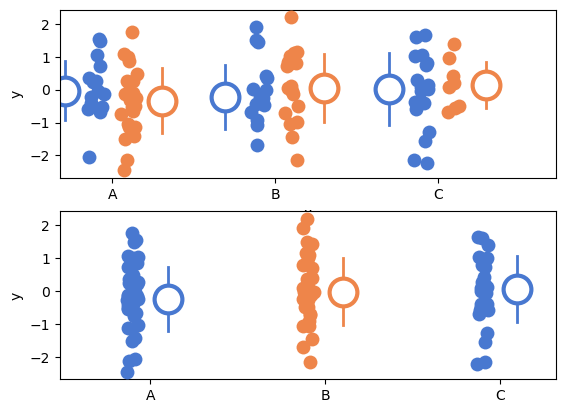

In [2]:
# Set the seed for reproducibility
np.random.seed(0)

# Create a random dataset
data = pd.DataFrame({
    'x': np.random.choice(['A', 'B', 'C'], 100),
    'y': np.random.normal(0, 1, 100),
    'hue': np.random.choice(['red', 'blue'], 100)
})

# Create a palette
palette = sns.color_palette("muted", 2)

# Create a figure and axes
fig, axs = plt.subplots(2, 1)

# Test the combined function with x
lnd(
    data, 'y', 'hue', 'x', palette=palette, agg_function=np.median, var_function=np.std,
    ax=axs[0], colors=None, line=True, dots=True, flipped=True,
    verbose=False, adtnl_space=0.1, mean_size=20, size=10, lw=2)

# Test the combined function without x
lnd(
    data, 'y', 'x', palette=palette, agg_function=np.median, 
    ax=axs[1], colors=None, line=True, dots=True, flipped=False,
    verbose=False, adtnl_space=0.1, mean_size=20, size=10, lw=2)

plt.show()

Now that non-paired datapoints are looking good, let's try to solve the paired ones.
First we genereate the pairs and then we will try to use `lnd` to plot

In [3]:
# Generate the sample dataset as described earlier
np.random.seed(0)
constant_A = 0.5
constant_B = 0.5
noise_std = 0.1
num_points = 50

data_A_red = np.random.normal(0, 1, num_points)
data_B_red = np.random.normal(0, 1, num_points)
data_C_red = np.random.normal(0, 1, num_points)
data_A_blue = data_A_red + constant_A + np.random.normal(0, noise_std, num_points)
data_B_blue = data_B_red - constant_B + np.random.normal(0, noise_std, num_points)
data_C_blue = np.random.normal(0, 1, num_points)

data = pd.DataFrame({
    'x': ['A'] * num_points + ['A'] * num_points + ['B'] * num_points + ['B'] * num_points + ['C'] * num_points + ['C'] * num_points,
    'y': np.concatenate([data_A_red, data_A_blue, data_B_red, data_B_blue, data_C_red, data_C_blue]),
    'hue': ['red'] * num_points + ['blue'] * num_points + ['red'] * num_points + ['blue'] * num_points + ['red'] * num_points + ['blue'] * num_points
})

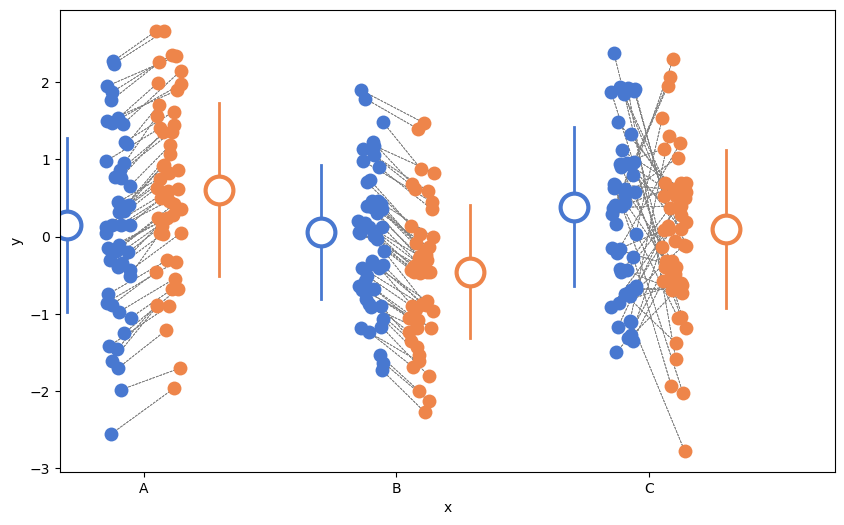

In [6]:
# Create a palette
palette = sns.color_palette("muted", 2)

# Create a figure and axes
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Test the enhanced lnd function with hairlines
lnd(
    data, 'y', 'hue', 'x', palette=palette, agg_function=np.median, var_function=np.std,
    ax=ax, colors=None, line=True, dots=True, flipped=True,
    verbose=False, adtnl_space=0.1, mean_size=20, size=10, lw=2, hairlines=True
)

plt.show()